# Bayesian VOO

In [1]:
import ray
import numpy as np
import matplotlib.pyplot as plt
from util import cos_exp_square_nd,run_bavoo,plot_line,x_sampler,tic,toc
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
np.set_printoptions(precision=3)
print ("Packages Loaded.")

Packages Loaded.


In [2]:
def func_eval(x): # x:[n x d]
    y = cos_exp_square_nd(x)
    return y # y:[n x 1]

### Run BAVOO, VOO, and BO

setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.


[BAVOO] Elapsed time is [33.6219]sec.
[VOO] Elapsed time is [4.8786]sec.
[BO] Elapsed time is [12.2094]sec.
[Random] Elapsed time is [0.1758]sec.


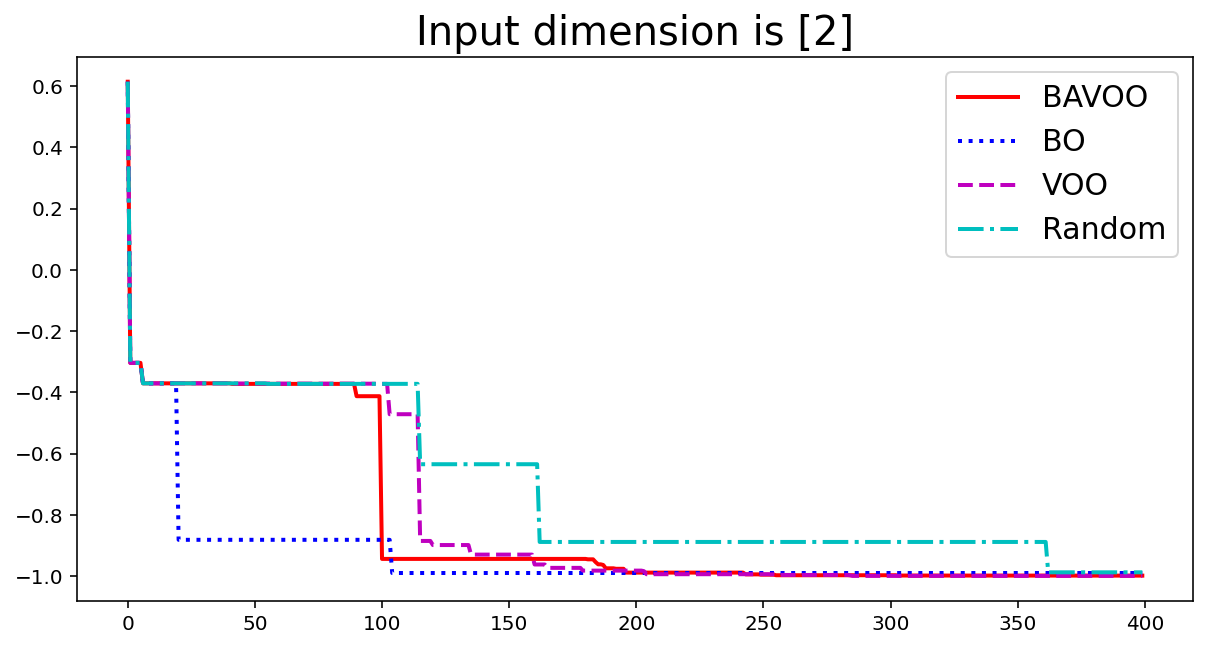

[BAVOO] Elapsed time is [77.5418]sec.
[VOO] Elapsed time is [16.8293]sec.
[BO] Elapsed time is [57.3709]sec.
[Random] Elapsed time is [0.3636]sec.


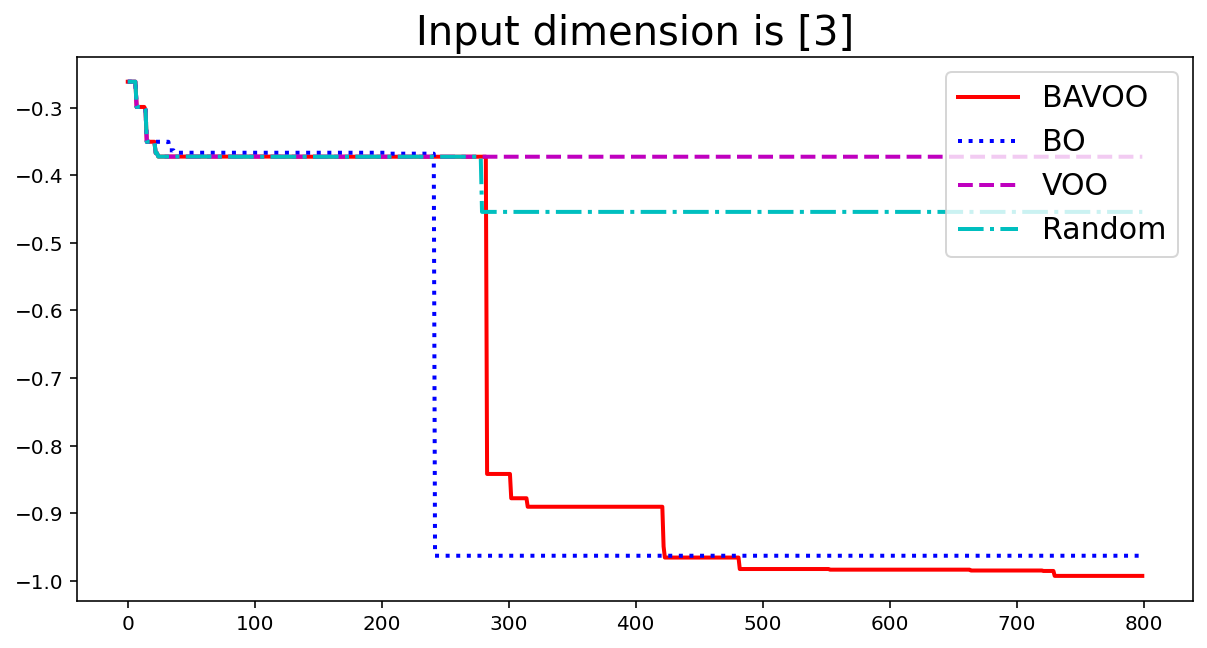

[BAVOO] Elapsed time is [251.6263]sec.
[VOO] Elapsed time is [46.6864]sec.
[BO] Elapsed time is [389.7035]sec.
[Random] Elapsed time is [0.7447]sec.


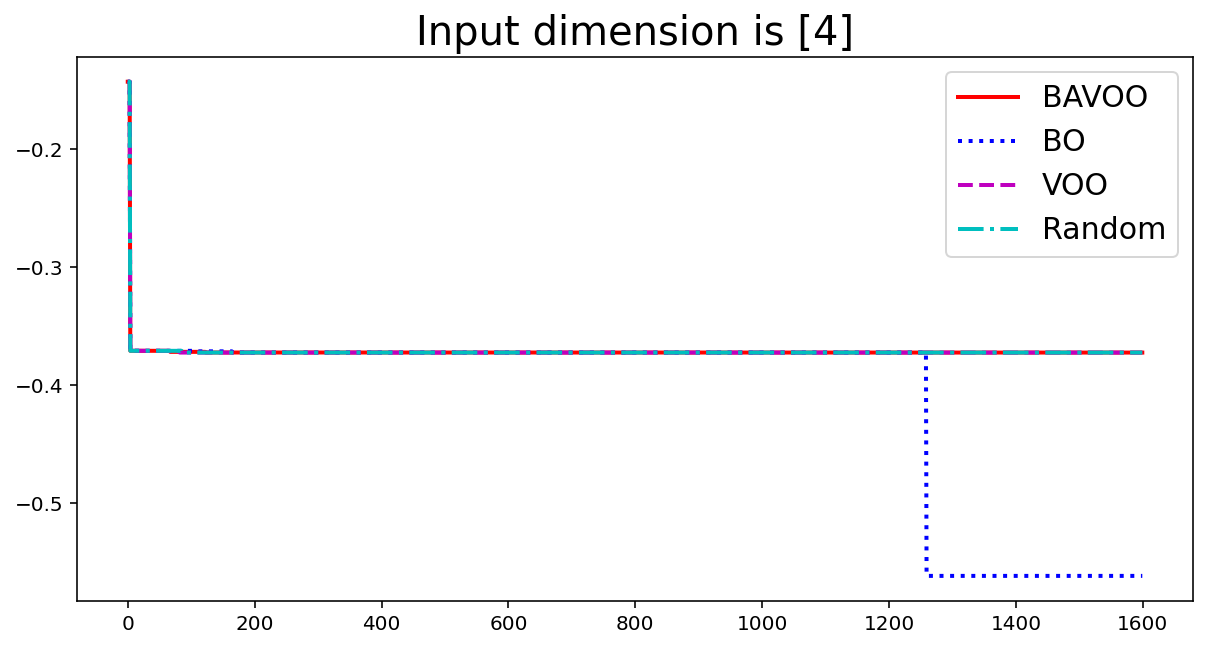

In [ ]:
xmin,xmax,seed,VERBOSE = -1.0,+1.0,1,False
USE_RAY,n_worker,n_sample_for_bo,max_try_sbv = True,20,1000,1000
gain,invlen,eps = 1,5,1e-6 # invlen(5)
ray.init(configure_logging=False)
for xdim in [2,3,4,5]:
    n_data_max = 100*int(2**xdim)
    x_minmax = np.tile(np.array([[xmin,xmax]]),(xdim,1))
    # Run BAVOO
    tic()
    x_data_bv,y_data_bv = run_bavoo(func_eval,x_minmax,USE_RAY=USE_RAY,
        n_random=1,n_bo=1,n_voo=1,n_cd=0,USE_KDPP=True,
        n_data_max=n_data_max,n_worker=n_worker,seed=seed,
        n_sample_for_bo=n_sample_for_bo,gain=gain,invlen=invlen,eps=eps,
        max_try_sbv=max_try_sbv,save_folder='',VERBOSE=VERBOSE)
    toc('BAVOO')
    # Run VOO
    tic()
    x_data_voo,y_data_voo = run_bavoo(func_eval,x_minmax,USE_RAY=USE_RAY,
        n_random=1,n_bo=0,n_voo=1,n_cd=0,USE_KDPP=False,
        n_data_max=n_data_max,n_worker=n_worker,seed=seed,
        n_sample_for_bo=n_sample_for_bo,gain=gain,invlen=invlen,eps=eps,
        max_try_sbv=max_try_sbv,save_folder='',VERBOSE=VERBOSE)
    toc('VOO')
    # Run BO
    tic()
    x_data_bo,y_data_bo = run_bavoo(func_eval,x_minmax,USE_RAY=USE_RAY,
        n_random=0,n_bo=1,n_voo=0,n_cd=0,USE_KDPP=False,
        n_data_max=n_data_max,n_worker=n_worker,seed=seed,
        n_sample_for_bo=n_sample_for_bo,gain=gain,invlen=invlen,eps=eps,
        max_try_sbv=max_try_sbv,save_folder='',VERBOSE=VERBOSE)
    toc('BO')
    # Run Totally Random
    tic()
    x_data_rand,y_data_rand = run_bavoo(func_eval,x_minmax,USE_RAY=USE_RAY,
        n_random=1,n_bo=0,n_voo=0,n_cd=0,USE_KDPP=False,
        n_data_max=n_data_max,n_worker=n_worker,seed=seed,
        n_sample_for_bo=n_sample_for_bo,gain=gain,invlen=invlen,eps=eps,
        max_try_sbv=max_try_sbv,save_folder='',VERBOSE=VERBOSE)
    toc('Random')
    # Plot results
    xin = np.linspace(0,n_data_max-1,n_data_max).reshape((-1,1))
    plot_line(x=xin,y=np.minimum.accumulate(y_data_bv[:n_data_max,0:1]),fmt='-',lc='r',label='BAVOO',
              x2=xin,y2=np.minimum.accumulate(y_data_bo[:n_data_max,0:1]),fmt2=':',lc2='b',label2='BO',
              x3=xin,y3=np.minimum.accumulate(y_data_voo[:n_data_max,0:1]),fmt3='--',lc3='m',label3='VOO',
              x4=xin,y4=np.minimum.accumulate(y_data_rand[:n_data_max,0:1]),fmt4='-.',lc4='c',ms4=2,
              label4='Random',
              tstr='Input dimension is [%d]'%(xdim),tfs=20,
              lloc='upper right')
ray.shutdown()